In [1]:
from prob3 import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_excel('FlightPre/Data_Train.xlsx')
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
test = pd.read_excel('FlightPre/Test_set.xlsx')
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [6]:
train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [8]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [10]:
train.duplicated().sum()

220

In [11]:
train.value_counts().sum()

10682

In [12]:
train.value_counts().unique()

array([3, 2, 1])

In [13]:
train.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [14]:
train['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [15]:
train['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [16]:
train['Day'] = train.Date_of_Journey.str.split("/").str[0]

In [17]:
train['Month'] = train.Date_of_Journey.str.split("/").str[1]

In [18]:
train['Year'] = train.Date_of_Journey.str.split("/").str[2]

In [19]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Day              10683 non-null  object
 12  Month            10683 non-null  object
 13  Year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [21]:
train['Day'] = train['Day'].astype(int)

In [22]:
train['Month'] = train['Month'].astype(int)

In [23]:
train['Year'] = train['Year'].astype(int)

In [24]:
train.drop(['Date_of_Journey'],axis=1,inplace=True)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Day              10683 non-null  int64 
 11  Month            10683 non-null  int64 
 12  Year             10683 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


In [26]:
train

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [27]:
train.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
5,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,2019
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,1,3,2019
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625,27,5,2019


In [28]:
train['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [29]:
train.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [30]:
train.Dep_Time.unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [31]:
train['Dep_hour'] = train.Dep_Time.str.split(':').str[0]
train['Dep_min'] = train.Dep_Time.str.split(":").str[1]

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Day              10683 non-null  int64 
 11  Month            10683 non-null  int64 
 12  Year             10683 non-null  int64 
 13  Dep_hour         10683 non-null  object
 14  Dep_min          10683 non-null  object
dtypes: int64(4), object(11)
memory usage: 1.2+ MB


In [33]:
train['Dep_hour'] = train['Dep_hour'].astype(int)
train['Dep_min'] = train['Dep_min'].astype(int)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Day              10683 non-null  int64 
 11  Month            10683 non-null  int64 
 12  Year             10683 non-null  int64 
 13  Dep_hour         10683 non-null  int64 
 14  Dep_min          10683 non-null  int64 
dtypes: int64(6), object(9)
memory usage: 1.2+ MB


In [35]:
train['Dep_hour']

0        22
1         5
2         9
3        18
4        16
         ..
10678    19
10679    20
10680     8
10681    11
10682    10
Name: Dep_hour, Length: 10683, dtype: int64

In [36]:
train.drop(['Dep_Time'],axis=1,inplace=True)

In [37]:
train


,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,2019,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,2019,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,2019,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,2019,11,30


In [38]:
train.Arrival_Time.unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [39]:
train.Arrival_Time = train.Arrival_Time.apply(lambda x : x.split(" ")[0])

In [40]:
train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [41]:
train['Arrival_hour'] = train.Arrival_Time.str.split(':').str[0]
train['Arrival_min'] = train.Arrival_Time.str.split(":").str[1]

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Day              10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Dep_hour         10683 non-null  int64 
 13  Dep_min          10683 non-null  int64 
 14  Arrival_hour     10683 non-null  object
 15  Arrival_min      10683 non-null  object
dtypes: int64(6), object(10)
memory usage: 1.3+ MB


In [43]:
train['Arrival_hour'] = train['Arrival_hour'].astype(int)
train['Arrival_min'] = train['Arrival_min'].astype(int)

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Day              10683 non-null  int64 
 10  Month            10683 non-null  int64 
 11  Year             10683 non-null  int64 
 12  Dep_hour         10683 non-null  int64 
 13  Dep_min          10683 non-null  int64 
 14  Arrival_hour     10683 non-null  int64 
 15  Arrival_min      10683 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 1.3+ MB


In [45]:
train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [46]:
train.drop(['Arrival_Time'],axis=1,inplace=True)


In [47]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Day              10683 non-null  int64 
 9   Month            10683 non-null  int64 
 10  Year             10683 non-null  int64 
 11  Dep_hour         10683 non-null  int64 
 12  Dep_min          10683 non-null  int64 
 13  Arrival_hour     10683 non-null  int64 
 14  Arrival_min      10683 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.2+ MB


In [49]:
train.Duration.unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [50]:
train['Duration_hour'] = train.Duration.apply(lambda x :x.split("h")[0])

In [51]:
train['Duration_hour']

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_hour, Length: 10683, dtype: object

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Day              10683 non-null  int64 
 9   Month            10683 non-null  int64 
 10  Year             10683 non-null  int64 
 11  Dep_hour         10683 non-null  int64 
 12  Dep_min          10683 non-null  int64 
 13  Arrival_hour     10683 non-null  int64 
 14  Arrival_min      10683 non-null  int64 
 15  Duration_hour    10683 non-null  object
dtypes: int64(8), object(8)
memory usage: 1.3+ MB


In [53]:
train['Duration_hour'] = train['Duration_hour'].astype(int)

ValueError: invalid literal for int() with base 10: '5m'

In [54]:
train[train['Duration_hour']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,6,3,2019,16,50,16,55,5m


In [55]:
train.drop(6474,axis=0,inplace=True)

In [56]:
train['Duration_hour'] = train['Duration_hour'].astype(int)

In [57]:
train.drop(['Duration'],axis=1,inplace=True)

In [58]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4


In [59]:
train.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1519
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [60]:
train.Total_Stops.isnull().sum()

1

In [61]:
train.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [62]:
train['Total_Stops'].mode()[0]

'1 stop'

In [63]:
fill_value=0
fill_types=["Mode_Fill"]
columns=["Total_Stops"]
dataframe_name="Train Dataset"
fill_missing_values(train,fill_value,fill_types,columns,dataframe_name)

Missing Values BEFORE REMOVAL in  Train Dataset  data


Airline            0
Source             0
Destination        0
Route              1
Total_Stops        1
Additional_Info    0
Price              0
Day                0
Month              0
Year               0
Dep_hour           0
Dep_min            0
Arrival_hour       0
Arrival_min        0
Duration_hour      0
dtype: int64

Missing Values AFTER REMOVAL in  Train Dataset  data


Airline            0
Source             0
Destination        0
Route              1
Total_Stops        0
Additional_Info    0
Price              0
Day                0
Month              0
Year               0
Dep_hour           0
Dep_min            0
Arrival_hour       0
Arrival_min        0
Duration_hour      0
dtype: int64

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,2019,19,55,22,25,2
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,2019,20,45,23,20,2
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,2019,8,20,11,20,3
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,2019,11,30,14,10,2


In [64]:
train['Total_Stops'].fillna(train['Total_Stops'].mode()[0],inplace=True)

In [65]:
train['Total_Stops'].isnull().sum()

0

In [66]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4


In [67]:
##train.drop(['Route'],axis=1,inplace=True)
train.drop(['Duration'],axis=1,inplace=True)

KeyError: "['Duration'] not found in axis"

In [68]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4


In [69]:
train.Additional_Info.head()

0    No info
1    No info
2    No info
3    No info
4    No info
Name: Additional_Info, dtype: object

In [70]:
train['Additional_Info'].isnull().sum()

0

In [71]:
train['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [72]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_airline = LabelEncoder()
LabelEncoder_Source = LabelEncoder()
LabelEncoder_Destination = LabelEncoder()
LabelEncoder_Total_Stops = LabelEncoder()
LabelEncoder_Additional_Info = LabelEncoder()


In [73]:
train['Airline'] = LabelEncoder_airline.fit_transform(train['Airline'])  # 2 steps ---> 1.fit 2. tranform 3 .fit_tranform  -- >[indigo-6 , visthra --->5 ]
train['Source'] = LabelEncoder_Source.fit_transform(train['Source'])
train['Destination'] = LabelEncoder_Source.fit_transform(train['Destination'])
train['Total_Stops'] = LabelEncoder_Source.fit_transform(train['Total_Stops'])
train['Additional_Info'] = LabelEncoder_Source.fit_transform(train['Additional_Info'])

In [74]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour
0,3,0,5,BLR → DEL,4,8,3897,24,3,2019,22,20,1,10,2
1,1,3,0,CCU → IXR → BBI → BLR,1,8,7662,1,5,2019,5,50,13,15,7
2,4,2,1,DEL → LKO → BOM → COK,1,8,13882,9,6,2019,9,25,4,25,19
3,3,3,0,CCU → NAG → BLR,0,8,6218,12,5,2019,18,5,23,30,5
4,3,0,5,BLR → NAG → DEL,0,8,13302,1,3,2019,16,50,21,35,4


In [75]:
LabelEncoder_airline.transform(["Jet Airways"])

array([4])

In [76]:
##LabelEncoder_airline.transform(["AirIndia"])

In [77]:
train.drop(['Route'],axis=1,inplace=True)

In [78]:
train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour
0,3,0,5,4,8,3897,24,3,2019,22,20,1,10,2
1,1,3,0,1,8,7662,1,5,2019,5,50,13,15,7
2,4,2,1,1,8,13882,9,6,2019,9,25,4,25,19
3,3,3,0,0,8,6218,12,5,2019,18,5,23,30,5
4,3,0,5,0,8,13302,1,3,2019,16,50,21,35,4


In [79]:
train['Dep_hour'].mean()

12.490357610934282

In [80]:
train['Dep_hour'].std()

5.748818946566094

In [81]:
upperlimit = train['Dep_hour'].mean() + 3*train['Dep_hour'].std()
lowerlimit = train['Dep_hour'].mean() - 3*train['Dep_hour'].std()

In [82]:
upperlimit

29.736814450632565

In [83]:
lowerlimit

-4.7560992287640005

In [84]:
train['Dep_hour']<upperlimit

0        True
1        True
2        True
3        True
4        True
         ... 
10678    True
10679    True
10680    True
10681    True
10682    True
Name: Dep_hour, Length: 10682, dtype: bool

In [85]:
train['Dep_hour']>lowerlimit


0        True
1        True
2        True
3        True
4        True
         ... 
10678    True
10679    True
10680    True
10681    True
10682    True
Name: Dep_hour, Length: 10682, dtype: bool

In [86]:
train['Price']

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [87]:
train['Price'].mean()

9086.292735442801

In [88]:
upperlimit1 = train['Price'].mean() + 3*train['Price'].std()
lowerlimit1= train['Price'].mean() - 3*train['Price'].std()

In [89]:
upperlimit1

22918.94982142857

In [90]:
lowerlimit1

-4746.364350542966

In [91]:
train[train['Price']<upperlimit1]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour
0,3,0,5,4,8,3897,24,3,2019,22,20,1,10,2
1,1,3,0,1,8,7662,1,5,2019,5,50,13,15,7
2,4,2,1,1,8,13882,9,6,2019,9,25,4,25,19
3,3,3,0,0,8,6218,12,5,2019,18,5,23,30,5
4,3,0,5,0,8,13302,1,3,2019,16,50,21,35,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,8,4107,9,4,2019,19,55,22,25,2
10679,1,3,0,4,8,4145,27,4,2019,20,45,23,20,2
10680,4,0,2,4,8,7229,27,4,2019,8,20,11,20,3
10681,10,0,5,4,8,12648,1,3,2019,11,30,14,10,2


In [92]:
10586-10682

-96

In [93]:
train.shape

(10682, 14)

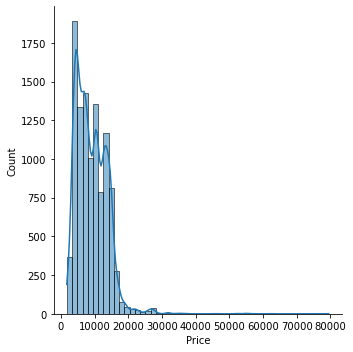

In [94]:
sns.displot(train['Price'],bins=50,kde=True)

/home/user/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

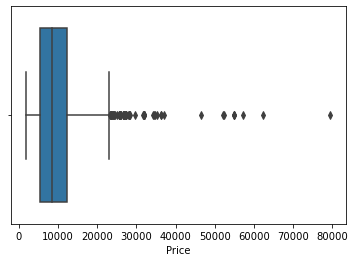

In [95]:
sns.boxplot(train['Price'])

In [96]:
train['Price'].mean()

9086.292735442801

/home/user/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

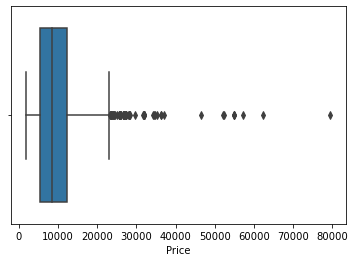

In [97]:
sns.boxplot('Price',data=train)

In [98]:
train[train['Price']>upperlimit1]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour
123,1,2,1,0,8,27430,1,3,2019,23,0,19,15,20
396,6,2,1,0,8,36983,1,3,2019,12,50,19,15,6
486,4,0,5,0,8,26890,1,3,2019,8,55,15,15,6
510,4,0,5,0,8,26890,1,3,2019,7,0,12,25,5
597,1,4,3,1,8,25139,6,3,2019,9,40,15,15,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,4,4,3,1,8,24210,6,3,2019,19,50,16,50,21
10364,5,0,5,0,3,57209,1,3,2019,9,45,14,25,4
10383,4,0,5,0,8,26890,1,3,2019,7,0,5,5,22
10439,4,0,5,0,8,31825,1,3,2019,18,40,9,0,14


In [99]:
train['Price'].quantile(0.95)

15764.0

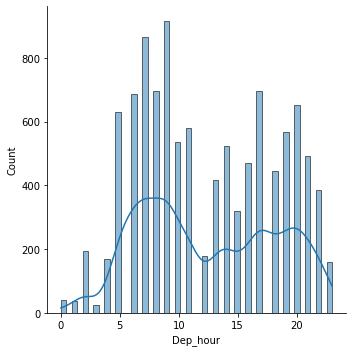

In [100]:
sns.displot(train['Dep_hour'],bins=50,kde=True)

In [101]:
upperlimit2 = train['Price'].quantile(0.95)
lowerlimit2 = train['Price'].quantile(0.05)

In [102]:
upperlimit2

15764.0

In [103]:
lowerlimit2

3543.0

In [104]:
train[train['Price'] < upperlimit2]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour
0,3,0,5,4,8,3897,24,3,2019,22,20,1,10,2
1,1,3,0,1,8,7662,1,5,2019,5,50,13,15,7
2,4,2,1,1,8,13882,9,6,2019,9,25,4,25,19
3,3,3,0,0,8,6218,12,5,2019,18,5,23,30,5
4,3,0,5,0,8,13302,1,3,2019,16,50,21,35,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,8,4107,9,4,2019,19,55,22,25,2
10679,1,3,0,4,8,4145,27,4,2019,20,45,23,20,2
10680,4,0,2,4,8,7229,27,4,2019,8,20,11,20,3
10681,10,0,5,4,8,12648,1,3,2019,11,30,14,10,2


In [105]:
10682-10144

538

In [106]:
train[train['Price'] > upperlimit2]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour
7,4,0,5,0,8,22270,1,3,2019,8,0,5,5,21
20,2,2,1,0,8,19495,6,3,2019,14,10,19,20,5
38,4,0,5,0,8,19225,6,3,2019,7,0,13,15,6
56,1,0,5,1,8,17345,1,3,2019,8,50,23,55,15
91,6,2,1,0,8,17057,6,3,2019,2,15,13,20,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10580,4,0,5,0,8,17261,6,3,2019,14,5,9,30,19
10625,4,2,1,1,5,19644,9,5,2019,11,40,19,0,7
10645,6,2,1,0,8,17057,3,3,2019,7,5,15,30,8
10668,4,2,1,1,8,21219,9,5,2019,11,40,19,0,7


In [107]:
upperlimit1 = train['Price'].mean() + 3*train['Price'].std()
lowerlimit1 = train['Price'].mean() - 3*train['Price'].std()

In [108]:
train.loc[train['Price'] > upperlimit1,'Price'] = upperlimit1

In [109]:
train[train['Price']>=upperlimit1]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour
123,1,2,1,0,8,22918.949821,1,3,2019,23,0,19,15,20
396,6,2,1,0,8,22918.949821,1,3,2019,12,50,19,15,6
486,4,0,5,0,8,22918.949821,1,3,2019,8,55,15,15,6
510,4,0,5,0,8,22918.949821,1,3,2019,7,0,12,25,5
597,1,4,3,1,8,22918.949821,6,3,2019,9,40,15,15,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,4,4,3,1,8,22918.949821,6,3,2019,19,50,16,50,21
10364,5,0,5,0,3,22918.949821,1,3,2019,9,45,14,25,4
10383,4,0,5,0,8,22918.949821,1,3,2019,7,0,5,5,22
10439,4,0,5,0,8,22918.949821,1,3,2019,18,40,9,0,14


In [110]:
upperlimit1

22918.94982142857

/home/user/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

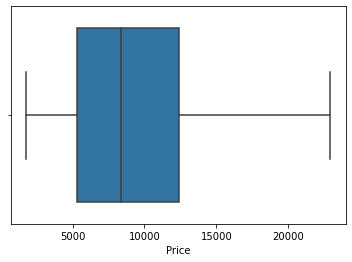

In [111]:
sns.boxplot('Price',data=train)

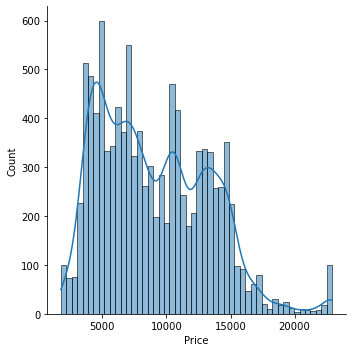

In [112]:
sns.displot(train['Price'],bins=50,kde=True)

In [113]:
train['Price'].mean()

9020.247255463122

In [114]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc1 = sc.fit_transform(train)


In [115]:
train

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour
0,3,0,5,4,8,3897.0,24,3,2019,22,20,1,10,2
1,1,3,0,1,8,7662.0,1,5,2019,5,50,13,15,7
2,4,2,1,1,8,13882.0,9,6,2019,9,25,4,25,19
3,3,3,0,0,8,6218.0,12,5,2019,18,5,23,30,5
4,3,0,5,0,8,13302.0,1,3,2019,16,50,21,35,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,8,4107.0,9,4,2019,19,55,22,25,2
10679,1,3,0,4,8,4145.0,27,4,2019,20,45,23,20,2
10680,4,0,2,4,8,7229.0,27,4,2019,8,20,11,20,3
10681,10,0,5,4,8,12648.0,1,3,2019,11,30,14,10,2


In [116]:
pd.DataFrame(sc1,columns=train.columns)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour
0,-0.410805,-1.658435,2.416778,1.407223,0.499921,-1.203553,1.237288,-1.467707,0.0,1.654268,-0.234932,-1.800319,-0.889984,-0.970831
1,-1.261152,0.890299,-0.973732,-0.253644,0.499921,-0.319079,-1.475307,0.250153,0.0,-1.303000,1.363674,-0.050813,-0.587017,-0.382238
2,0.014369,0.040721,-0.295630,-0.253644,0.499921,1.142123,-0.531796,1.109082,0.0,-0.607172,0.031502,-1.362943,0.018918,1.030385
3,-0.410805,0.890299,-0.973732,-0.807267,0.499921,-0.658304,-0.177979,0.250153,0.0,0.958440,-1.034235,1.407109,0.321885,-0.617675
4,-0.410805,-1.658435,2.416778,-0.807267,0.499921,1.005869,-1.475307,-1.467707,0.0,0.610527,1.363674,1.115525,0.624852,-0.735394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,-1.686326,0.890299,-0.973732,1.407223,0.499921,-1.154220,-0.531796,-0.608777,0.0,1.132397,1.630108,1.261317,0.018918,-0.970831
10678,-1.261152,0.890299,-0.973732,1.407223,0.499921,-1.145293,1.591104,-0.608777,0.0,1.306354,1.097240,1.407109,-0.284050,-0.970831
10679,0.014369,-1.658435,0.382472,1.407223,0.499921,-0.420800,1.591104,-0.608777,0.0,-0.781129,-0.234932,-0.342397,-0.284050,-0.853113
10680,2.565411,-1.658435,2.416778,1.407223,0.499921,0.852232,-1.475307,-1.467707,0.0,-0.259258,0.297937,0.094979,-0.889984,-0.970831


/home/user/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day'>

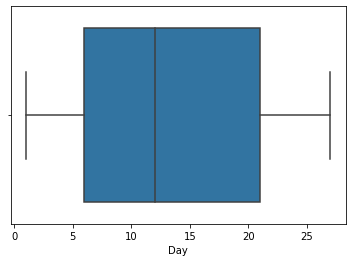

In [117]:
sns.boxplot('Day',data=train)

/home/user/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dep_min'>

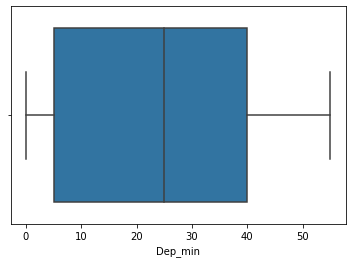

In [118]:
sns.boxplot('Dep_min',data=train)

upperlimit